# Topic Modeling Using Years 2001-2016

### Imports

In [71]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup
import time
from random import randint
from pymongo import MongoClient
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import NMF, TruncatedSVD
import matplotlib.pyplot as plt
import modules.modeling_module as mm
from spacy.en import STOP_WORDS as stopwords
import string
import spacy
nlp = spacy.load('en')
stopwords.update(['et', 'al', "'s", "—", '-'])
punctuations = string.punctuation
%matplotlib inline
plt.style.use('seaborn-talk')

### Connect to MongoDB

In [2]:
client = MongoClient()
sci = client.metis_p4_db.science

In [3]:
years = sci.find({'year': { "$gt": 2000, "$lt": 2017 } })


In [4]:
years[0]['description']

"Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives."

In [5]:
all_descriptions = []

for record in years:
    all_descriptions.append(record['description'])

In [6]:
all_descriptions[:2]

["Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives.",
 'In carpenter ants, separate behavioral classes, known as castes, are determined by the epigenetic regulation of genes. Simola et al. treated ants of different castes with drugs that affected histone acetylation. Reducing histone acetylation stimulated scouting and foraging behavior. The foraging and scouting behaviors of young ants were permanently changed 

In [7]:
len(all_descriptions)

32950

### Keep tokenizer 3 in notebook as this changes

In [8]:
def spacy_tokenizer_3(doc):
    """
    A tokenizer called during vectorization

    INPUT:
    doc - the text to be tokenized

    OUTPUT:
    Tokenized text with the appropriate numbers removed
    """    
    doc = doc.replace('—', '').replace(',', '').replace("'s", '')
    # doc = re.sub('\s\d+(\s)?(,)?', ' ', doc)
    # doc = re.sub('\D\d+(\D)?', ' ', doc)
    doc = re.sub('\w*\d+\w*', ' ', doc)
    doc = doc.replace('–', '').replace('£', '')
    tokens = nlp(doc)
    tokens = [tok.lemma_.lower().strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
    tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punctuations)]     
    return tokens

# Make different vectorizers and test models (LSA, NMF, LDA)

#### Start with tokenizer 3 as this worked best for a single year

In [9]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [10]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell new science use protein human year gene study research
Topic  1
cell protein gene signal t receptor mouse function t cell expression
Topic  2
researcher material information potential offer roundup laboratory interest newly apparatus
Topic  3
cell science research week new national stem scientist university u.s
Topic  4
protein science gene dna rna genome bind complex expression roundup
Topic  5
new isbn gene human university press new york york genome researcher
Topic  6
new isbn university press protein structure york new york use university press
Topic  7
isbn science gene change press climate roundup human university press university
Topic  8
protein year change climate ago year ago million isbn million year university
Topic  9
university isbn research press university press use human cambridge science state


-------NMF------


Topic  0
use system high state structure energy material quantum surface electron
Topic  1
cell stem stem cell t t cell 

count vectorizer 2

In [11]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=4)

In [12]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell new protein use science human gene year study research
Topic  1
cell protein gene signal t receptor mouse function t cell expression
Topic  2
researcher material information potential offer roundup laboratory interest newly apparatus
Topic  3
cell science research week new national scientist u.s stem university
Topic  4
protein gene science human genome dna rna sequence expression bind
Topic  5
science protein structure use state electron roundup week complex molecule
Topic  6
new isbn university protein press york new york structure use university press
Topic  7
science gene isbn press change roundup specie genome human university press
Topic  8
protein year change climate isbn ago year ago million ocean ice
Topic  9
new week story report roundup link follow researcher section entire


-------NMF------


Topic  0
use system high state structure energy material quantum surface electron
Topic  1
cell stem stem cell t t cell signal mouse immune response

#### Try to lower ngram range to 3 instead of 4

In [13]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=3)

In [14]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell new protein use science human year gene study research
Topic  1
cell protein gene signal t receptor mouse function t cell expression
Topic  2
researcher material information potential offer roundup laboratory interest newly apparatus
Topic  3
cell science research week new national scientist stem u.s university
Topic  4
protein gene science human genome dna rna bind sequence expression
Topic  5
new human isbn gene year researcher university new york york press
Topic  6
new isbn university protein press york new york structure use university press
Topic  7
science isbn gene change press climate roundup human university press specie
Topic  8
protein year change climate ago year ago million isbn ocean ice
Topic  9
new week story roundup link follow report section entire week story


-------NMF------


Topic  0
use system high state structure energy material quantum surface electron
Topic  1
cell stem stem cell t t cell signal mouse immune response tissue

count vectorizer 3

In [15]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [16]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
cell new science use protein human year gene research study
Topic  1
researcher roundup material information offer laboratory potential interest newly instrumentation
Topic  2
cell protein potential apparatus newly interest researcher potential interest instrumentation apparatus information newly weekly roundup
Topic  3
science cell week research roundup stem national stem cell story news
Topic  4
science protein roundup link story gene week follow entire section
Topic  5
gene protein new human genome isbn dna disease rna university
Topic  6
new isbn university press protein university press york new york structure use
Topic  7
week story new isbn link follow entire section story science week story
Topic  8
science isbn change climate press year university recent university press gene
Topic  9
protein year change climate ago year ago million membrane week bind


-------NMF------


Topic  0
use system high state energy quantum structure material electron su

#### Try tokenizer 1 as 3 did not work quite as well

In [17]:
cv_vect1, cv_vect1_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions)

In [18]:
mm.use_vectorizer(cv_vect1, cv_vect1_transformed)



-------LSA------


Topic  0
cell new protein use science human gene study research report
Topic  1
cell protein gene signal t receptor mouse function t cell stem cell
Topic  2
material researcher information potential offer roundup laboratory interest newly apparatus
Topic  3
cell science research week new stem national stem cell scientist university
Topic  4
new isbn 0 isbn 0 £ university press york new york university press
Topic  5
protein gene science dna genome human rna bind expression sequence
Topic  6
science isbn protein 0 isbn 0 £ press structure university use
Topic  7
protein new research structure scientist u.s bind state researcher membrane
Topic  8
new week story roundup gene link follow section entire story science
Topic  9
change protein climate new climate change year ocean ice global water


-------NMF------


Topic  0
research scientist u.s week national health researcher institute government university
Topic  1
science week roundup news story american link follow

In [19]:
cv_vect2, cv_vect2_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 5000, all_descriptions, ngram_stop=4)

In [20]:
mm.use_vectorizer(cv_vect2, cv_vect2_transformed)



-------LSA------


Topic  0
cell new protein use science human gene study research system
Topic  1
cell protein gene signal t receptor mouse t cell function stem cell
Topic  2
researcher material information potential offer roundup laboratory interest newly apparatus
Topic  3
cell science research week new national scientist stem u.s university
Topic  4
new gene isbn protein 0 isbn 0 £ human press university
Topic  5
new cell isbn 0 isbn 0 £ university press new york york
Topic  6
science protein isbn 0 isbn 0 £ structure press university electron
Topic  7
science gene change human isbn climate 0 isbn 0 £ specie
Topic  8
new gene week use story roundup science quantum follow genome
Topic  9
new change protein climate climate change ocean year ice global water


-------NMF------


Topic  0
new researcher york new york study work discuss drug report perspective
Topic  1
science week news roundup story national issue foundation american scientific
Topic  2
researcher material informatio

In [21]:
cv_vect3, cv_vect3_transformed = mm.count_vectorizer(mm.spacy_tokenizer_1, 110000, all_descriptions)

In [22]:
mm.use_vectorizer(cv_vect3, cv_vect3_transformed)



-------LSA------


Topic  0
cell new science use protein human gene study research researcher
Topic  1
researcher material roundup information offer laboratory potential interest newly instrumentation
Topic  2
cell protein potential apparatus newly interest researcher weekly roundup information newly instrumentation apparatus newly offer
Topic  3
cell science week research roundup stem national stem cell story news
Topic  4
science protein roundup story link follow week entire section pdf
Topic  5
gene protein human new genome dna isbn rna disease 0
Topic  6
isbn 0 isbn 0 £ new press university university press york new york
Topic  7
week human story link follow entire section gene week story story science
Topic  8
science change climate gene isbn human recent 0 isbn 0 £
Topic  9
protein change climate climate change year global ocean ice water week


-------NMF------


Topic  0
use system high state quantum energy structure material electron surface
Topic  1
researcher material info

### lets try tfidf vectorizer to compare
tfidf vectorizer 1

In [23]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [24]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
cell protein new science gene use human year research researcher
Topic  1
instrumentation apparatus weekly roundup potential interest apparatus laboratory offer instrumentation information newly roundup information newly offer interest researcher laboratory material
Topic  2
cell protein gene signal receptor t rna bind expression t cell
Topic  3
cell science week research stem stem cell university isbn roundup national
Topic  4
week story link roundup entire section science download pdf entire follow link roundup week download pdf pdf story science
Topic  5
isbn press university university press york new york oxford c$ c$ isbn cambridge
Topic  6
gene genome human dna sequence specie protein genetic rna disease
Topic  7
protein science structure rna dna quantum gene bind complex advancement science
Topic  8
science american association association advancement advancement science science publisher roundup recent news project monthly roundup publisher america

tfidf vectorizer 2

In [25]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=4)

In [26]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
cell protein new science gene use human year research study
Topic  1
information newly offer weekly roundup information newly offer instrumentation apparatus offer instrumentation apparatus laboratory material potential interest newly offer weekly roundup information weekly roundup information newly newly offer instrumentation
Topic  2
cell protein gene signal receptor t rna expression bind t cell
Topic  3
cell science research week stem stem cell national university u.s cancer
Topic  4
week story download pdf entire follow link science download entire section link roundup week story roundup week story science link roundup week link roundup pdf entire section
Topic  5
isbn press university university press york new york new c$ c$ isbn oxford
Topic  6
gene genome human dna sequence specie genetic protein rna disease
Topic  7
cell climate change year ice ocean climate change t stem cell stem
Topic  8
science american association american association advancem

tfidf vectorizer 3

In [27]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [28]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
apparatus laboratory information newly potential interest instrumentation apparatus weekly roundup offer instrumentation roundup information newly offer laboratory material interest researcher
Topic  1
cell science new protein gene use human year research change
Topic  2
download pdf follow link entire section roundup week link roundup science download pdf entire week story pdf story science
Topic  3
science news project roundup recent monthly roundup publisher american recent news project science science publisher association advancement advancement science
Topic  4
cell monthly roundup roundup recent news project publisher american recent news project science science publisher monthly association advancement
Topic  5
isbn cell university press university press new york new york research cambridge
Topic  6
isbn press university press university york new york oxford cambridge princeton press new
Topic  7
cell quantum state stem electron stem cell energy at

START

#### Try tfidf with tokenizer 3 to make sure we get the best choice

In [29]:
tf_vect1, tf_vect1_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions)

In [30]:
mm.use_vectorizer(tf_vect1, tf_vect1_transformed)



-------LSA------


Topic  0
cell protein new science gene use human year research researcher
Topic  1
instrumentation apparatus weekly roundup potential interest apparatus laboratory offer instrumentation information newly roundup information newly offer interest researcher laboratory material
Topic  2
cell protein gene signal receptor t rna bind expression t cell
Topic  3
cell science week research stem stem cell university isbn roundup national
Topic  4
week story link roundup entire section science download pdf entire follow link roundup week download pdf pdf story science
Topic  5
isbn press university university press york new york oxford c$ c$ isbn cambridge
Topic  6
gene genome human dna sequence specie protein genetic rna disease
Topic  7
protein science structure rna dna quantum gene bind complex advancement science
Topic  8
science american association association advancement advancement science science publisher roundup recent news project monthly roundup publisher america

tfidf vectorizer 2

In [31]:
tf_vect2, tf_vect2_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 5000, all_descriptions, ngram_stop=4)

#### This version of NMF looks good

In [32]:
mm.use_vectorizer(tf_vect2, tf_vect2_transformed)



-------LSA------


Topic  0
cell protein new science gene use human year research study
Topic  1
information newly offer weekly roundup information newly offer instrumentation apparatus offer instrumentation apparatus laboratory material potential interest newly offer weekly roundup information weekly roundup information newly newly offer instrumentation
Topic  2
cell protein gene signal receptor t rna expression bind t cell
Topic  3
cell science research week stem stem cell national university u.s cancer
Topic  4
week story download pdf entire follow link science download entire section link roundup week story roundup week story science link roundup week link roundup pdf entire section
Topic  5
isbn press university university press york new york new c$ c$ isbn oxford
Topic  6
gene genome human dna sequence specie genetic protein rna disease
Topic  7
cell climate change year ice ocean climate change t stem cell stem
Topic  8
science american association american association advancem

tfidf vectorizer 3

In [33]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

#### This version of NMF looks good

# This NMF model selected as final model

In [34]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed)



-------LSA------


Topic  0
apparatus laboratory information newly potential interest instrumentation apparatus weekly roundup offer instrumentation roundup information newly offer laboratory material interest researcher
Topic  1
cell science new protein gene use human year research change
Topic  2
download pdf follow link entire section roundup week link roundup science download pdf entire week story pdf story science
Topic  3
science news project roundup recent monthly roundup publisher american recent news project science science publisher association advancement advancement science
Topic  4
cell monthly roundup roundup recent news project publisher american recent news project science science publisher monthly association advancement
Topic  5
isbn cell university press university press new york new york research cambridge
Topic  6
isbn press university press university york new york oxford cambridge princeton press new
Topic  7
cell quantum state stem electron stem cell energy at

## Try previous model with different number of topics

In [35]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)

In [36]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed, n_comp=30)



-------LSA------


Topic  0
information newly instrumentation apparatus potential interest weekly roundup offer instrumentation roundup information newly offer apparatus laboratory laboratory material interest researcher
Topic  1
cell science new protein gene use human year research change
Topic  2
download pdf follow link science download entire section pdf entire roundup week link roundup week story pdf story science
Topic  3
science roundup recent news project monthly roundup publisher american recent news project science science publisher association advancement advancement science
Topic  4
cell news project monthly roundup roundup recent publisher american recent news project science science publisher monthly association advancement
Topic  5
isbn cell university press university press new york new york research cambridge
Topic  6
isbn press university press university york new york oxford cambridge princeton press new
Topic  7
cell quantum state stem electron stem cell energy sp

In [37]:
mm.use_vectorizer(tf_vect3, tf_vect3_transformed, n_comp=40)



-------LSA------


Topic  0
offer instrumentation roundup information newly offer potential interest instrumentation apparatus information newly weekly roundup apparatus laboratory laboratory material interest researcher
Topic  1
cell science new protein gene use human year research change
Topic  2
entire section roundup week science download link roundup download pdf pdf entire follow link week story pdf story science
Topic  3
science monthly roundup roundup recent news project publisher american recent news project science science publisher association advancement advancement science
Topic  4
cell roundup recent monthly roundup news project publisher american recent news project science science publisher monthly association advancement
Topic  5
isbn cell university press university press new york new york research cambridge
Topic  6
isbn press university press university york new york oxford cambridge princeton press new
Topic  7
cell quantum stem state electron stem cell energy sp

redistribution improve performance change result change surface catalytic reaction partial pressure adduct stoichiometric atom surface niñosouthern
Topic  18
influenza virus avian influenza virus avian influenza titan proteasome autism stratosphere stratospheric
Topic  19
roundup interest researcher weekly material potential laboratory material offer instrumentation apparatus laboratory newly offer potential interest instrumentation apparatus
Topic  20
cell difficult effort worth plio crater lunar clutter echo behaviour immunology society panel oversee electronic enable language modern
Topic  21
year orbit small object system giant detect directly planet way introduce neptune pluto planet atmosphere existence
Topic  22
intron crispr pol ii spliceosome piwi stationary cas molecular machine like protein sirnas
Topic  23
strive te spend million cold war multibillion transposable transposable element multibillion dollar u.s military olson
Topic  24
es cuprate ray scattering nematic tempera

# Final TOPICS

Topic  0

newly offer roundup information potential interest apparatus laboratory instrumentation apparatus information newly weekly roundup offer instrumentation laboratory material interest researcher

Topic  1

gene human genome dna genetic sequence disease specie expression mutation

Topic  2

download pdf roundup week follow link link roundup pdf entire science download entire section week story pdf story
science

Topic  3

science news project roundup recent monthly roundup publisher american recent news project science science publisher association advancement monthly

Topic  4

cell t stem stem cell t cell immune mouse tissue tumor cancer

Topic  5
science research national u.s week scientist new health institute world

Topic  6

isbn press university university press york new york oxford cambridge princeton press new

Topic  7

quantum electron use state material energy atom system spin field

Topic  8

climate change year ice ocean water global climate change sea carbon

Topic  9

protein rna bind membrane complex signal structure receptor pathway domain

# Try looking at articles from categories

In [39]:
tf_vect3, tf_vect3_transformed = mm.tfidf_vectorizer(spacy_tokenizer_3, 110000, all_descriptions)
norm = Normalizer()
vect_normalized = norm.fit_transform(tf_vect3_transformed)
model, model_transformed = mm.nmf_tfidf(vect_normalized, n_comp=10)

In [40]:
def sort_papers_to_topics(num_topics, model_transformed):
    """
    Makes a dictionary with topics as keys and the index and vectorized values as values
    
    INPUT:
    num_topics - the number of topics desired
    model_transformed - the model used for topic modeling
    
    OUTPUT:
    topic_dict - a dictionary of topics and values
    """
    topic_dict = {}
    for topic in range(num_topics):
        topic_dict[topic] = []
    for index, item in enumerate(model_transformed):
        topic_num = np.argmax(item)
        topic_dict[topic_num].append([index, item])
    return topic_dict

In [41]:
papers_and_topics = sort_papers_to_topics(10, model_transformed)

In [42]:
def print_papers(topic_dict, topic_number):
    """
    A function to return the documents corresponding to each topic
    
    INPUTS:
    topic_dict - a dictionary of topics and their index and values after transforming with the model
    topic_number - the topic number where examples should be printed out
    """
    topic_counts = []
    for item in topic_dict[topic_number]:
        doc_index = item[0]
        doc = all_descriptions[doc_index]
        topic_counts.append(doc)
    return topic_counts

In [44]:
counts = print_papers(papers_and_topics, 0)
Counter(counts).most_common(1)

[('A weekly roundup of information on newly offered instrumentation, apparatus, and laboratory materials of potential interest to researchers.',
  372)]

In [47]:
counts = print_papers(papers_and_topics, 1)
Counter(counts).most_common(3)

[('Several thousand years ago, human beings realized the virtues of domesticating wild animals as easy meat. Soon other possibilities became apparent, and as revealed in a series of papers in this issue, early pastoralists became selective about breeding for wool, leather, milk, and muscle power. In two papers, Gibbs et al. report on the bovine genome sequence (p. 522; see the cover, the Perspective by Lewin, and the Policy Forum by Roberts) and trace the diversity and genetic history of cattle (p. 528), while Chessa et al. (p. 532) survey the occurrence of endogenous retroviruses in sheep and map their distribution to historical waves of human selection and dispersal across Europe. Finally, Ludwig et al. (p. 485) note the origins of variation in the coat-color of horses and suggest that it is most likely to have been selected for by humans in need of good-looking transport.',
  4),
 ('Maize is one of our oldest and most important crops, having been domesticated approximately 9000 year

In [45]:
counts = print_papers(papers_and_topics, 2)
Counter(counts).most_common(4)

[("Follow the links below for a roundup of the week's top stories in science, or download a PDF of the entire section.\n",
  153),
 ("Follow the links below for a roundup of the week's top stories in science, or download a PDF of the entire section.",
  4),
 ("On this week's show: Bioengineering vocal cords and a roundup of daily news stories.",
  2),
 ('LANG SON, VIETNAM--\n    HIV is largely confined to injecting drug users in Vietnam, but it is crossing into China. A novel cross-border project is tackling the drug route. This story is part of a series on HIV/AIDS in Asia; the stories in this initial installment focus on Myanmar, Vietnam, Cambodia, and Thailand.\n    ',
  2)]

In [48]:
counts = print_papers(papers_and_topics, 3)
Counter(counts).most_common(4)

[("A monthly roundup of recent news and projects of Science's publisher, the American Association for the Advancement of Science.",
  66),
 ("\n    A monthly roundup of recent news and projects of\n    Science's publisher, the American Association for the Advancement of Science.\n  ",
  43),
 ('\n    About 1200 researchers gathered here from 21 to 26 April for back-to-back meetings of the Paleoanthropology Society and the American Association of Physical Anthropologists.\n  ',
  3),
 ('\n    Budget deficits may force the 50,000-member American Institute of Chemical Engineers to merge with the American Chemical Society, from which AIChE broke in 1908 to provide a stronger voice for the then-fledgling profession.\n    ',
  2)]

In [49]:
counts = print_papers(papers_and_topics, 4)
Counter(counts).most_common(4)

[('To determine the epigenetic mechanisms that direct blood cells to develop into the many components of our immune system, the BLUEPRINT consortium examined the regulation of DNA and RNA transcription to dissect the molecular traits that govern blood cell differentiation. By inducing immune responses, Saeed et al. document the epigenetic changes in the genome that underlie immune cell differentiation. Cheng et al. demonstrate that trained monocytes are highly dependent on the breakdown of sugars in the presence of oxygen, which allows cells to produce the energy needed to mount an immune response. Chen et al. examine RNA transcripts and find that specific cell lineages use RNA transcripts of different length and composition (isoforms) to form proteins. Together, the studies reveal how epigenetic effects can drive the development of blood cells involved in the immune system.',
  3),
 ('Immunological memory protects against reinfection. Resident memory T cells (TRM) are long-lived and r

In [50]:
counts = print_papers(papers_and_topics, 5)
Counter(counts).most_common(4)

[('\n    First aired 2 years ago by European research chief Philippe Busquin, the concept of a European Research Area to promote cross-border research projects and to help coordinate research across the continent has won acclaim. But implementation--particularly the role for basic research in the ERA--is hotly debated.\n    Science\n    has solicited the views of four prominent European statesmen on this issue.\n    Enric Banda\n    leads off with a discussion of ways in which a European Research Council can serve as a support structure and how the European Science Foundation can be involved. In counterpoint,\n    Sir George Radda\n    comments that scientific networking across Europe is proceeding well without the need for a new administrative structure.\n    Hans Wigzell\n    believes that the Framework Programme itself needs to be split into a European Research Council and an Innovation Council to promote large projects.\n    Ernst-Ludwig Winnacker\n    suggests strategies that will

In [64]:
counts = print_papers(papers_and_topics, 6)
Counter(counts).most_common(3)

[("The world of biological chemistry lost one of its most creative pioneers when Roger Y. Tsien died on 24 August 2016 at the age of 64 while biking on a challenging trail in Eugene, Oregon, where he and his wife Wendy had their home. Tsien, who shared the 2008 Nobel Prize in Chemistry, was a professor in the Departments of Pharmacology and of Chemistry and Biochemistry at the University of California, San Diego (UCSD). Born in New York City and raised in Livingston, New Jersey, Roger had special talents that were manifested early—he won the Westinghouse Science Talent Search at age 16 for his original research project, “Bridging in Transition Metal Thiocyanate Complexes.” After graduating summa cum laude from Harvard College with a bachelor's degree in chemistry and physics, he studied at Cambridge University, receiving a Ph.D. in physiology in 1977 before joining the faculties of the University of California (UC), Berkeley, and, 7 years later, UCSD, where he spent most of his career.

In [51]:
counts = print_papers(papers_and_topics, 7)
Counter(counts).most_common(3)

[("In July 2015, the New Horizons spacecraft flew through the Pluto system at high speed, humanity's first close look at this enigmatic system on the outskirts of our solar system. In a series of papers, the New Horizons team present their analysis of the encounter data downloaded so far: Moore et al. present the complex surface features and geology of Pluto and its large moon Charon, including evidence of tectonics, glacial flow, and possible cryovolcanoes. Grundy et al. analyzed the colors and chemical compositions of their surfaces, with ices of H2O, CH4, CO, N2, and NH3 and a reddish material which may be tholins. Gladstone et al. investigated the atmosphere of Pluto, which is colder and more compact than expected and hosts numerous extensive layers of haze. Weaver et al. examined the small moons Styx, Nix, Kerberos, and Hydra, which are irregularly shaped, fast-rotating, and have bright surfaces. Bagenal et al. report how Pluto modifies its space environment, including interaction

In [52]:
counts = print_papers(papers_and_topics, 8)
Counter(counts).most_common(3)

[("Since 17 July 2011, NASA's spacecraft Dawn has been orbiting the asteroid Vesta—the second most massive and the third largest asteroid in the solar system (see the cover). Russell et al. (p. 684) use Dawn's observations to confirm that Vesta is a small differentiated planetary body with an inner core, and represents a surviving proto-planet from the earliest epoch of solar system formation; Vesta is also confirmed as the source of the howardite-eucrite-diogenite (HED) meteorites. Jaumann et al. (p. 687) report on the asteroid's overall geometry and topography, based on global surface mapping. Vesta's surface is dominated by numerous impact craters and large troughs around the equatorial region. Marchi et al. (p. 690) report on Vesta's complex cratering history and constrain the age of some of its major regions based on crater counts. Schenk et al. (p. 694) describe two giant impact basins located at the asteroid's south pole. Both basins are young and excavated enough amounts of mat

In [53]:
counts = print_papers(papers_and_topics, 9)
Counter(counts).most_common(3)

[('The mTORC1 protein kinase complex plays central roles in regulating cell growth and metabolism and is implicated in common human diseases such as diabetes and cancer. The level of the amino acid leucine tells an organism a lot about its physiological state, including how much food is available, how much insulin is going to be needed, and whether new muscle mass can be made (see the Perspective by Buel and Blenis). Wolfson et al. identified a biochemical sensor of leucine, Sestrin2, which connects the concentration of leucine to the control of organismal metabolism and growth. When leucine bound to Sestrin2, it was released from a complex with the mTORC1 regulatory factor GATOR2, activating the mTORC1 complex. Saxton et al. describe the crystal structure of Sestrin2 and show how it specifically detects leucine. Aylett et al. determined the structure of human mTORC1 by cryoelectron microscopy and the crystal structure of a regulatory subunit, Raptor. The results reveal the structural 

In [79]:
vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer_3,
                             ngram_range=(1,2),
                             max_df = 0.6,
                             max_features=110000)

vect_trans = vectorizer.fit_transform(all_descriptions)

norm = Normalizer()
vect_normalized = norm.fit_transform(vect_trans)

model, model_transformed = mm.nmf_tfidf(vect_normalized, n_comp=10)

### Try t-sne

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 32950 samples in 0.929s...
[t-SNE] Computed neighbors for 32950 samples in 17.334s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32950
[t-SNE] Computed conditional probabilities for sample 2000 / 32950
[t-SNE] Computed conditional probabilities for sample 3000 / 32950
[t-SNE] Computed conditional probabilities for sample 4000 / 32950
[t-SNE] Computed conditional probabilities for sample 5000 / 32950
[t-SNE] Computed conditional probabilities for sample 6000 / 32950
[t-SNE] Computed conditional probabilities for sample 7000 / 32950
[t-SNE] Computed conditional probabilities for sample 8000 / 32950
[t-SNE] Computed conditional probabilities for sample 9000 / 32950
[t-SNE] Computed conditional probabilities for sample 10000 / 32950
[t-SNE] Computed conditional probabilities for sample 11000 / 32950
[t-SNE] Computed conditional probabilities for sample 12000 / 32950
[t-SNE] Computed conditional probabilities for sa

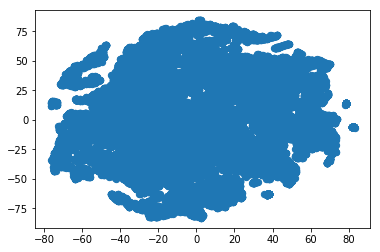

In [109]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

tsne_model = TSNE(n_components=2, random_state=0,verbose=2, perplexity=20)
low_data = tsne_model.fit_transform(model_transformed)

x,y = zip(*low_data)
plt.scatter(x, y, s=40);

# Lets track trends over time

#### First lets track the 10 topics

In [80]:
def sort_papers_to_topics(num_topics, model_transformed):
    """
    Makes a dictionary with topics as keys and the index and vectorized values as values
    
    INPUT:
    num_topics - the number of topics desired
    model_transformed - the model used for topic modeling
    
    OUTPUT:
    topic_dict - a dictionary of topics and values
    """
    topic_dict = {}
    for topic in range(num_topics):
        topic_dict[topic] = []
    for index, item in enumerate(model_transformed):
        topic_num = np.argmax(item)
        topic_dict[topic_num].append([index, item])
    return topic_dict

In [81]:
papers_and_topics = sort_papers_to_topics(10, model_transformed)

In [82]:
def print_papers(topic_dict, topic_number):
    """
    A function to return the documents corresponding to each topic
    
    INPUTS:
    topic_dict - a dictionary of topics and their index and values after transforming with the model
    topic_number - the topic number where examples should be printed out
    """
    topic_counts = []
    for item in topic_dict[topic_number]:
        doc_index = item[0]
        doc = all_descriptions[doc_index]
        topic_counts.append(doc)
    return topic_counts

In [83]:
years_for_topic_trends = sci.find({'year': { "$gt": 2000, "$lt": 2017 } })

In [84]:
years_for_topic_trends[0]

{'_id': ObjectId('59f8f1ca127ab45bd3582636'),
 'description': "Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives.",
 'title': 'Multidrug evolutionary strategies to reverse antibiotic resistance',
 'year': 2016}

In [85]:
all_years = []

for record in years_for_topic_trends:
    all_years.append(record['year'])

In [86]:
all_years[:2]

[2016, 2016]

In [87]:
len(all_years), len(all_descriptions)

(32950, 32950)

In [88]:
descr_and_year = list(zip(all_descriptions, all_years))

In [89]:
descr_and_year[0]

("Antibiotic resistance threatens to put modern medicine into reverse. But we are not at the end of our options for currently available drugs. Baym et al. review what can be done by using combinations of antibiotics to circumvent bacteria's evolutionary strategies. For instance, resistance to one drug may cause sensitivity to another, the effectiveness of two drugs can be synergized by a resistance mutation, and some negative drug interactions may even be beneficial in selecting against resistance. Although not simple to assess, drug combinations still have something to offer for the development of sorely needed anti-infectives.",
 2016)

In [90]:
# initializing dictionary with years as key then a dictionary of topics 0-9 as keys and counts as values
yearly_counts = {}
for year in range(2001, 2017):
    yearly_counts[year] = {}
    for topic in range(0,10):
        yearly_counts[year][topic] = 0

In [91]:
yearly_counts[2016]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

In [92]:
# Topics 0-9 as keys and the index for each document in that topic
topic_dict = {}
for topic in range(0,10):
    topic_dict[topic] = []
for index, item in enumerate(model_transformed):
    topic_num = np.argmax(item)
    topic_dict[topic_num].append(index)

In [67]:
topic_dict[0]

[17,
 54,
 85,
 119,
 152,
 184,
 223,
 258,
 291,
 328,
 372,
 407,
 443,
 478,
 519,
 557,
 592,
 634,
 671,
 705,
 755,
 789,
 823,
 859,
 894,
 932,
 952,
 968,
 999,
 1034,
 1063,
 1101,
 1134,
 1167,
 1203,
 1235,
 1271,
 1305,
 1345,
 1380,
 1414,
 1451,
 1484,
 1523,
 1558,
 1600,
 1639,
 1675,
 1712,
 1746,
 1785,
 1820,
 1859,
 1896,
 1939,
 1978,
 2022,
 2069,
 2105,
 2139,
 2151,
 2180,
 2197,
 2227,
 2269,
 2315,
 2359,
 2400,
 2441,
 2482,
 2525,
 2568,
 2613,
 2656,
 2719,
 2759,
 2806,
 2844,
 2898,
 2940,
 2992,
 3042,
 3054,
 3132,
 3169,
 3215,
 3264,
 3315,
 3355,
 3396,
 3437,
 3476,
 3514,
 3567,
 3608,
 3655,
 3703,
 3742,
 3781,
 3823,
 3869,
 3909,
 3948,
 3987,
 4030,
 4068,
 4117,
 4159,
 4200,
 4237,
 4273,
 4321,
 4359,
 4401,
 4440,
 4493,
 4518,
 4556,
 4597,
 4642,
 4684,
 4725,
 4776,
 4818,
 4865,
 4906,
 4945,
 4960,
 4985,
 5024,
 5062,
 5104,
 5145,
 5188,
 5200,
 5228,
 5266,
 5306,
 5345,
 5406,
 5446,
 5494,
 5506,
 5533,
 5570,
 5608,
 5650,
 57

In [93]:
for topic_number in range(0,10):
    for item in topic_dict[topic_number]:
        doc_index = item
        doc_year = descr_and_year[doc_index][1]
        # print(doc_index, doc)
        yearly_counts[doc_year][topic_number] += 1

In [94]:
yearly_counts[2016]

{0: 53, 1: 257, 2: 2, 3: 7, 4: 186, 5: 420, 6: 5, 7: 444, 8: 313, 9: 190}

#### Plot various topics to get a sense of trends over time

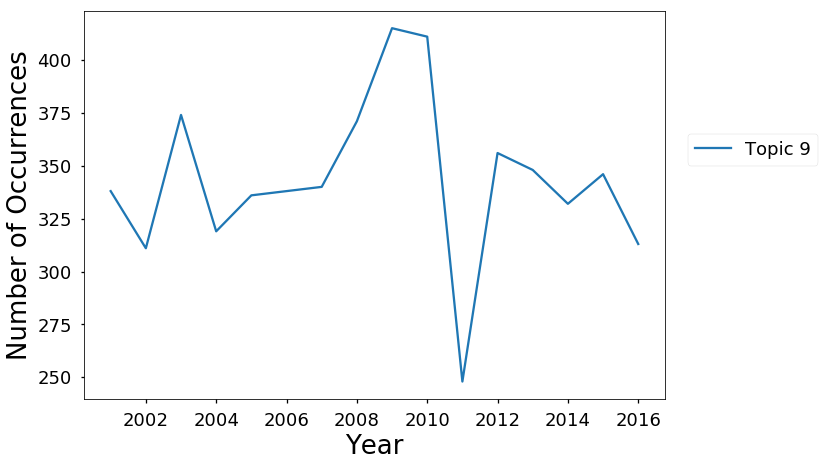

In [96]:
years = [year for year in range(2001,2017)]
not_used = [0, 2, 3, 5, 6]
for topic in range(0,10):
    if topic == 8:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.6), fontsize=18)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_1_topic.png'
        plt.savefig(save_path, bbox_inches='tight');

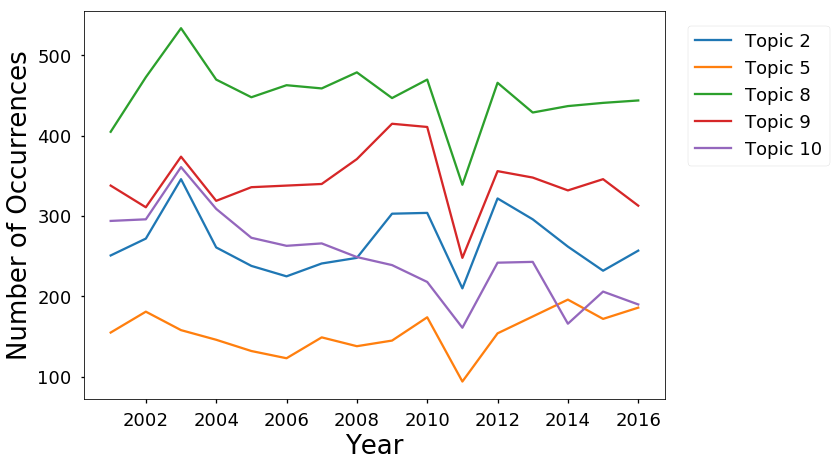

In [95]:
years = [year for year in range(2001,2017)]
not_used = [0, 2, 3, 5, 6]
for topic in range(0,10):
    if topic not in not_used:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.6), fontsize=18)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_10_topics.png'
        plt.savefig(save_path, bbox_inches='tight');

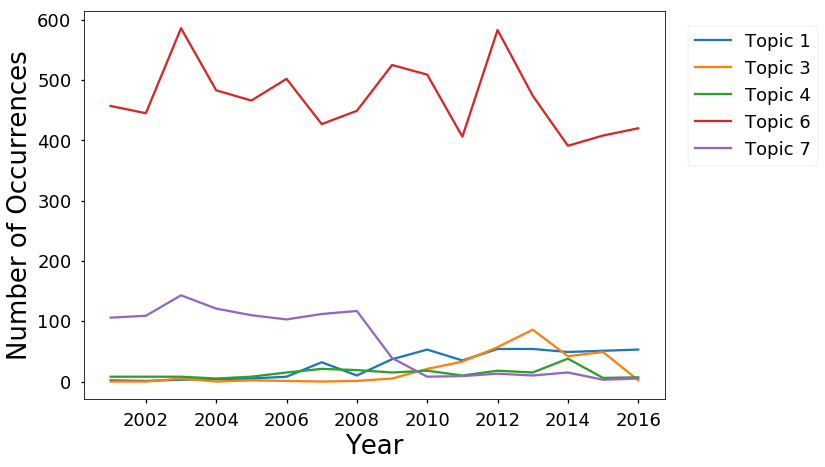

In [76]:
years = [year for year in range(2001,2017)]
not_used = [0, 2, 3, 5, 6]
for topic in range(0,10):
    if topic in not_used:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.6), fontsize=18)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_10_topics_not_sci.png'
        plt.savefig(save_path, bbox_inches='tight');

### Now lets look at 30 topics

note that topics from model are labeled 0-29 but in the graph are 1-30!!

In [97]:
vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer_3,
                             ngram_range=(1,2),
                             max_df = 0.6,
                             max_features=110000)

vect_trans = vectorizer.fit_transform(all_descriptions)

norm = Normalizer()
vect_normalized = norm.fit_transform(vect_trans)

model, model_transformed = mm.nmf_tfidf(vect_normalized, n_comp=30)

In [98]:
# initializing dictionary with years as key then a dictionary of topics 0-29 as keys and counts as values
yearly_counts = {}
for year in range(2001, 2017):
    yearly_counts[year] = {}
    for topic in range(0,30):
        yearly_counts[year][topic] = 0

In [99]:
# Topics 0-29 as keys and the index for each document in that topic
topic_dict = {}
for topic in range(0,30):
    topic_dict[topic] = []
for index, item in enumerate(model_transformed):
    topic_num = np.argmax(item)
    topic_dict[topic_num].append(index)

In [100]:
for topic_number in range(0,30):
    for item in topic_dict[topic_number]:
        doc_index = item
        doc_year = descr_and_year[doc_index][1]
        # print(doc_index, doc)
        yearly_counts[doc_year][topic_number] += 1

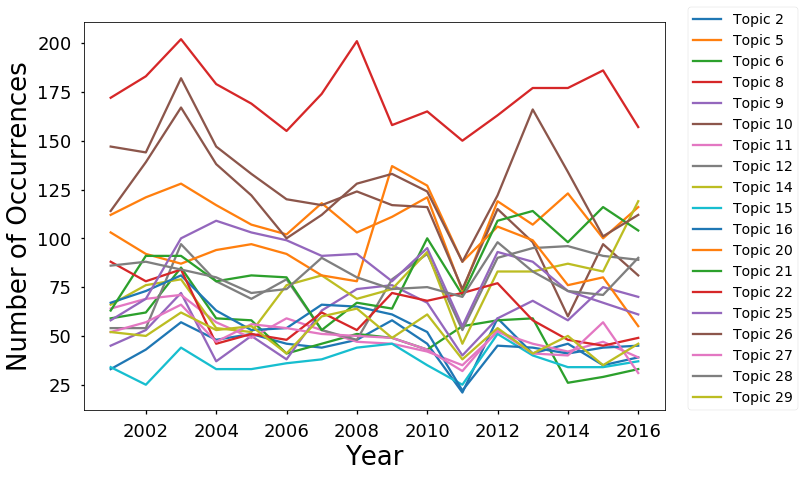

In [108]:
years = [year for year in range(2001,2017)]
not_used = [0, 2, 3, 6, 12, 16, 17, 18, 22, 23, 29]
for topic in range(0,30):
    if topic not in not_used:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0), fontsize=14)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics.png'
        plt.savefig(save_path, bbox_inches='tight');

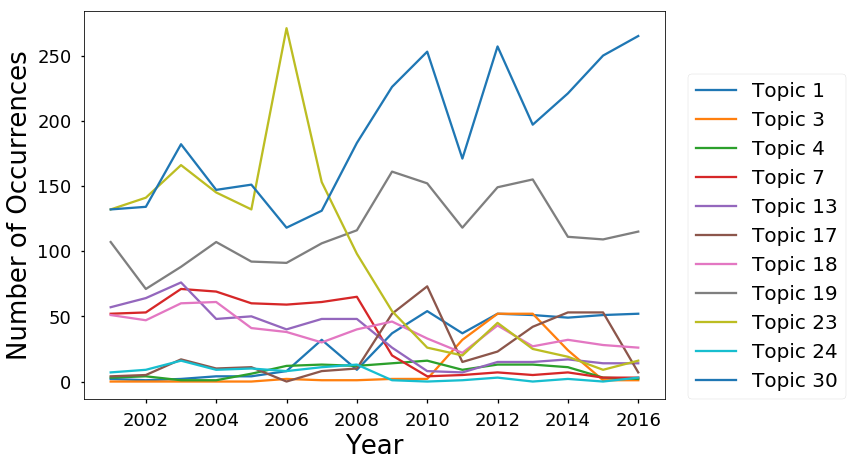

In [107]:
years = [year for year in range(2001,2017)]
not_used = [0, 2, 3, 6, 12, 16, 17, 18, 22, 23]
for topic in range(0,30):
    if topic in not_used:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0), fontsize=20)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics_not_sci.png'
        plt.savefig(save_path, bbox_inches='tight');

### Chemistry topics

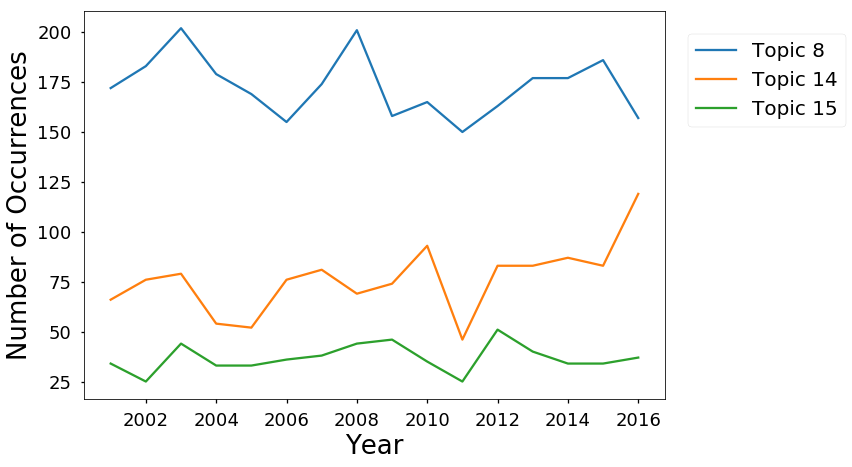

In [131]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 14]
for topic in range(0,30):
    if topic in keep:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.70), fontsize=20)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics_chemistry.png'
        plt.savefig(save_path, bbox_inches='tight');

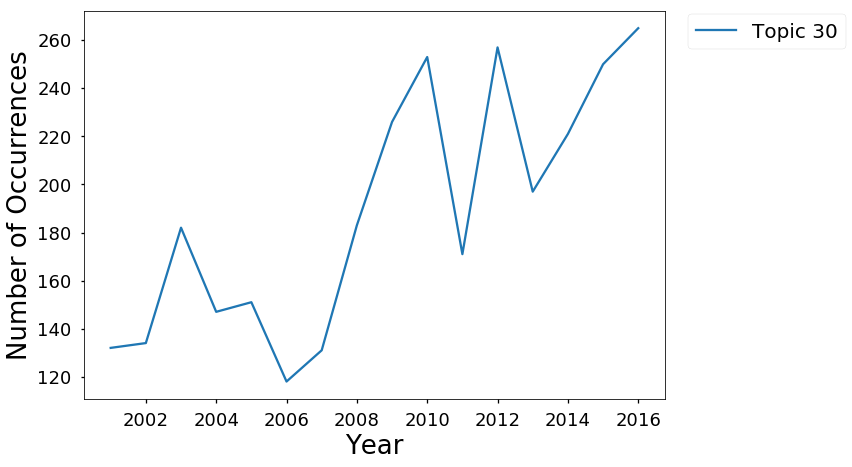

In [124]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 9, 25, 29]
for topic in range(0,30):
    if topic == 29:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.90), fontsize=20)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics_fastestgrowing.png'
        plt.savefig(save_path, bbox_inches='tight');

## Next is a decreasing topic, protein membrane signal bind receptor complex structure domain pathway kinase

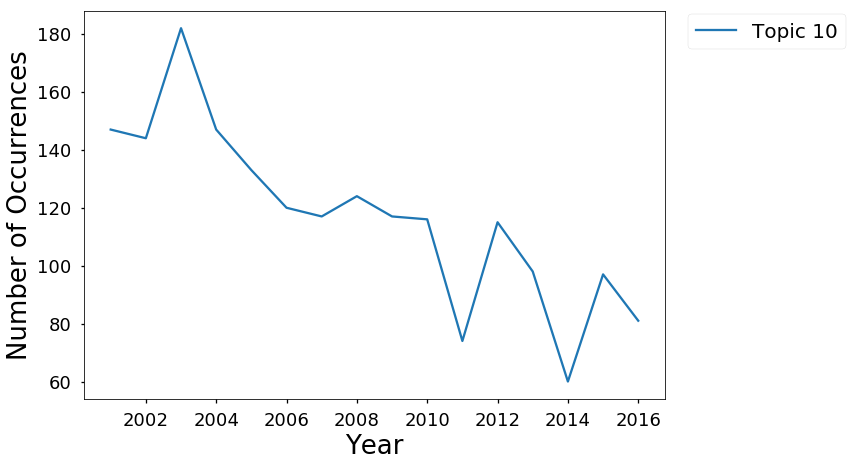

In [122]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 9, 25]
for topic in range(0,30):
    if topic == 9:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.9), fontsize=20)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics_decreasing.png'
        plt.savefig(save_path, bbox_inches='tight');

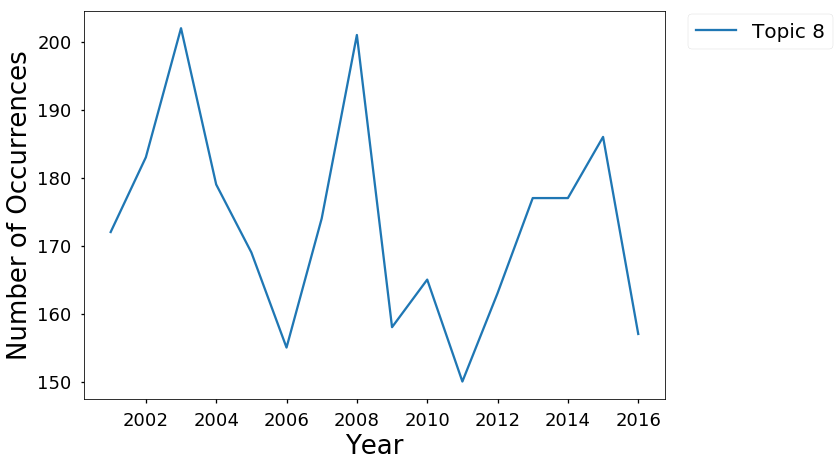

In [156]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 9, 25]
for topic in range(0,30):
    if topic == 7:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.plot(years, topic_counts, label='Topic ' + str(topic+1))
        plt.legend(loc=(1.04,0.9), fontsize=20)
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        plt.xticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_30_topics_one_topic.png'
        plt.savefig(save_path, bbox_inches='tight');

Topic  0
information newly apparatus laboratory roundup information potential interest weekly roundup offer instrumentation instrumentation apparatus newly offer laboratory material interest researcher
Topic  1
specie plant population diversity ecosystem animal forest ecological community evolutionary
Topic  2
link roundup entire section pdf entire follow link roundup week science download download pdf week story pdf story science
Topic  3
news project roundup recent monthly roundup publisher american recent news project science science publisher monthly association advancement advancement science
Topic  4
cell stem stem cell t t cell immune tissue signal embryonic mouse
Topic  5
research u.s government scientist university agency week new funding european
Topic  6
isbn press university cambridge university press press cambridge oxford ma cambridge ma chicago
Topic  7
material electron structure magnetic use field temperature surface high property
Topic  8
climate change climate change global warming temperature ocean model warm atmospheric
Topic  9
protein membrane signal bind receptor complex structure domain pathway kinase
Topic  10
star galaxy black hole hole black ray universe x x ray gamma
Topic  11
virus vaccine infection immune influenza hiv host antibody viral response
Topic  12
york new york isbn new c$ c$ isbn york c$ york isbn press new london
Topic  13
carbon reaction water catalyst molecule bond hydrogen chemical organic compound
Topic  14
quantum state spin system atom photon information qubit quantum information dot
Topic  15
gene expression gene expression transcription genetic mutation factor identify function transcription factor
Topic  16
daily news news daily week story roundup daily roundup news story news site site
Topic  17
institute national health nih national institute institute health health nih director u.s national u.s
Topic  18
science national foundation national science science foundation student education nsf academy science technology
Topic  19
year ago year ago million million year early fossil old record date
Topic  20
cancer drug tumor disease patient mutation therapy trial treatment clinical
Topic  21
genome human sequence human genome genome sequence genetic dna sequencing genomic datum
Topic  22
-- researcher read report meeting scientist new week page society
Topic  23
princeton princeton university nj press princeton princeton nj nj isbn university press isbn university press
Topic  24
solar planet system solar system earth mar moon comet planetary space
Topic  25
brain neuron memory activity cortex neuronal neural behavior mouse visual
Topic  26
ice ice sheet sea sheet sea level water ocean level greenland antarctic
Topic  27
dna rna strand polymerase rna polymerase mrna transcription replication complex bind
Topic  28
earthquake fault mantle seismic plate zone rupture slip earth large
Topic  29
state world united united state country health china nation people public

# Change plots to bar plots

### Chemistry topics

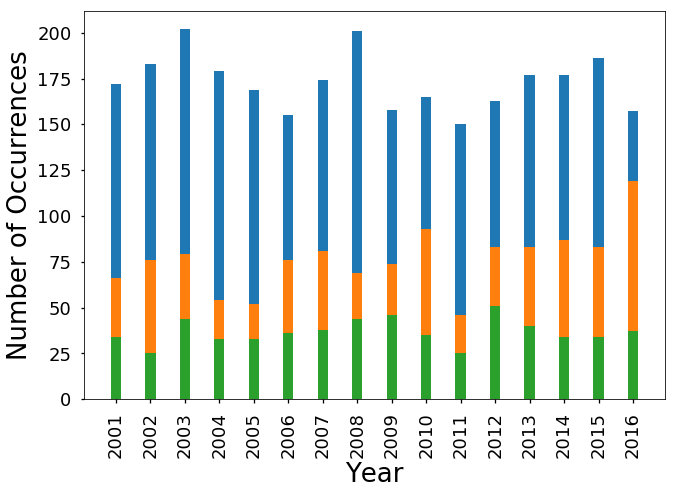

In [169]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 14]
for topic in range(0,30):
    if topic in keep:
        w = 0.3
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.bar(range(len(years)), topic_counts, align='center', width=w)
        plt.xticks(range(len(years)), range(2001,2017), fontsize=18, rotation='vertical')
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        #save_path = '/Users/murdock/Documents/metis/project4/15_yrs_most_popular_bar.png'
        #plt.savefig(save_path, bbox_inches='tight');

### Most popular topic by year

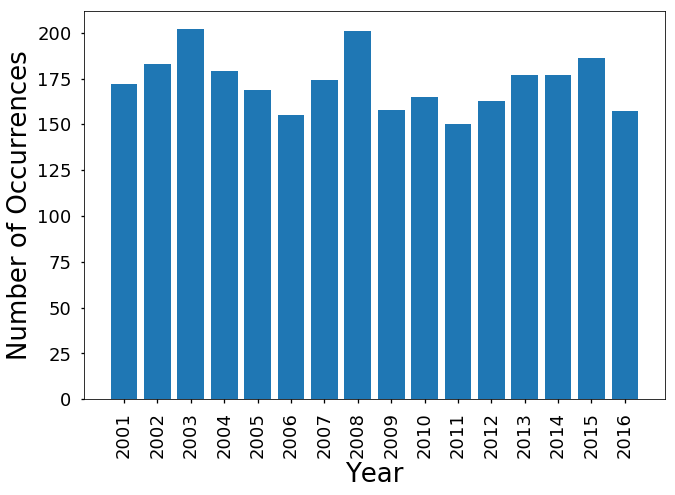

In [171]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 9, 25]
for topic in range(0,30):
    if topic == 7:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.bar(range(len(years)), topic_counts, align='center')
        plt.xticks(range(len(years)), range(2001,2017), fontsize=18, rotation='vertical')
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_most_popular_bar.png'
        plt.savefig(save_path, bbox_inches='tight');

## Next is a decreasing topic, protein membrane signal bind receptor complex structure domain pathway kinase

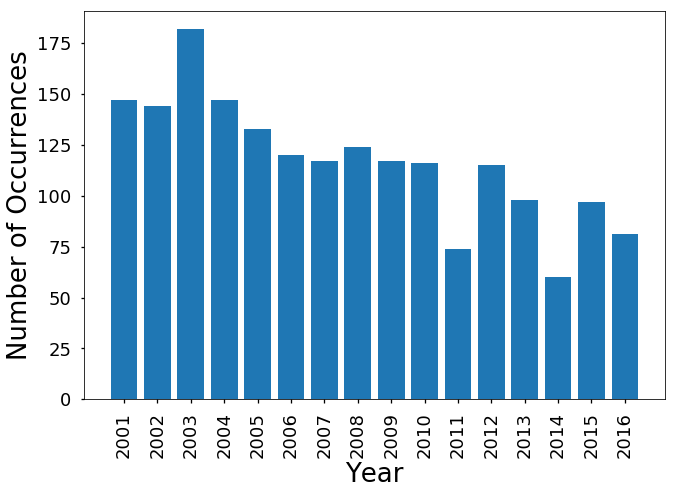

In [172]:
years = [year for year in range(2001,2017)]
keep = [7, 13, 9, 25]
for topic in range(0,30):
    if topic == 9:
        topic_counts = [yearly_counts[year][topic] for year in range(2001, 2017)]
        plt.bar(range(len(years)), topic_counts, align='center')
        plt.xticks(range(len(years)), range(2001,2017), fontsize=18, rotation='vertical')
        plt.xlabel('Year', fontsize=26)
        plt.ylabel('Number of Occurrences', fontsize=26)
        plt.yticks(fontsize=18)
        save_path = '/Users/murdock/Documents/metis/project4/15_yrs_decreasing_bar.png'
        plt.savefig(save_path, bbox_inches='tight');

# Plot the distribution of topics for the 15 year period

In [132]:
counts = {}
for topic in range(0,30):
    counts[topic] = 0

counts

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0}

In [133]:
topics = {}
for topic in range(0,30):
    topics[topic] = []
for index, item in enumerate(model_transformed):
    topic_num = np.argmax(item)
    topics[topic_num].append(index)

In [134]:
for topic_number in range(0,30):
    for item in topics[topic_number]:
        doc_index = item
        # print(doc_index, doc)
        counts[topic_number] += 1

In [136]:
counts

{0: 445,
 1: 715,
 2: 170,
 3: 133,
 4: 1778,
 5: 813,
 6: 544,
 7: 2768,
 8: 945,
 9: 1872,
 10: 818,
 11: 1217,
 12: 547,
 13: 1221,
 14: 589,
 15: 876,
 16: 383,
 17: 625,
 18: 1848,
 19: 1492,
 20: 1380,
 21: 999,
 22: 1452,
 23: 93,
 24: 1331,
 25: 2000,
 26: 779,
 27: 1288,
 28: 811,
 29: 3018}

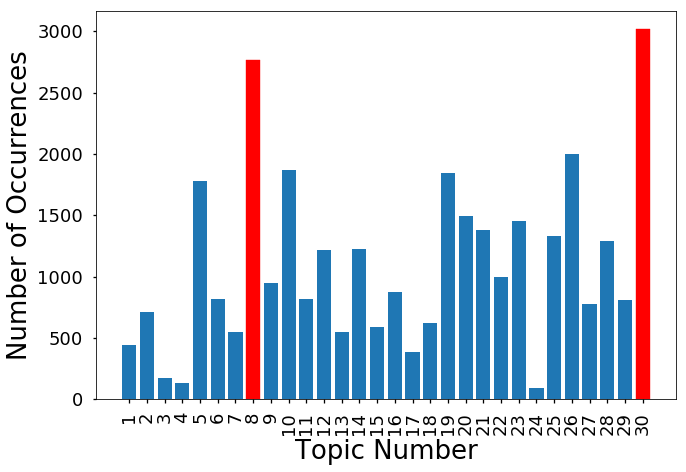

In [151]:
plot = plt.bar(range(len(counts)), counts.values(), align='center')
plt.xticks(range(len(counts)), range(1,31), fontsize=18, rotation='vertical')
plt.xlabel('Topic Number', fontsize=26)
plt.ylabel('Number of Occurrences', fontsize=26)
plt.yticks(fontsize=18)
plot[29].set_color('r')
plot[7].set_color('r')
#plot[4].set_color('r')
save_path = '/Users/murdock/Documents/metis/project4/15_year_topic_counts.png'
plt.savefig(save_path, bbox_inches='tight');

In [158]:
years

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]